# Read Kerchunked files

In [40]:
from pathlib import Path
import warnings
import pqdm

import fsspec
import xarray as xr

import matplotlib.pyplot as plt

In [25]:
json_files = sorted(list(Path('temp').glob('*.json')))

In [26]:
def open_reference_ds(file):
    fs = fsspec.filesystem(
        'reference', 
        fo=str(file), 
        # remote_protocol='s3', 
        # remote_options=dict(anon=False), 
        skip_instance_cache=True
        )
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ds = xr.open_dataset(fs.get_mapper(""), 
                             engine='zarr', 
                             consolidated=False)
    return ds

In [37]:
%%time
datasets = [open_reference_ds(f) for f in json_files]
ds = xr.concat(datasets, dim='time')
ds

CPU times: user 16.3 s, sys: 1.37 s, total: 17.6 s
Wall time: 25.6 s


<xarray.Dataset> Size: 538MB
Dimensions:                     (time: 388800)
Coordinates:
  * time                        (time) datetime64[ns] 3MB 2019-10-15 ... 2020...
Data variables: (12/172)
    atmos_pressure_2m           (time) float64 3MB nan nan nan ... nan nan nan
    atmos_pressure_2m_qc        (time) float64 3MB nan nan nan ... nan nan nan
    atmos_pressure_mast         (time) float64 3MB nan nan nan ... nan nan nan
    atmos_pressure_mast_qc      (time) float64 3MB nan nan nan ... nan nan nan
    azimuth                     (time) float64 3MB nan nan nan ... nan nan nan
    azimuth_qc                  (time) float64 3MB nan nan nan ... nan nan nan
    ...                          ...
    wspd_w_std_mast             (time) float64 3MB nan nan nan ... nan nan nan
    wspd_w_std_mast_qc          (time) float64 3MB nan nan nan ... nan nan nan
    zenith_apparent             (time) float64 3MB nan nan nan ... nan nan nan
    zenith_apparent_qc          (time) float64 3MB nan nan nan ... nan nan nan
    zenith_true                 (time) float64 3MB nan nan nan ... nan nan nan
    zenith_true_qc              (time) float64 3MB nan nan nan ... nan nan nan
Attributes: (12/20)
    contact:                   Matthew Shupe, University of Colorado, matthew...
    conventions:               cf convention variable naming as attribute whe...
    creator_email:             michael.r.gallagher@noaa.gov; christopher.j.co...
    date_created:              Fri Feb  3 13:32:57 2023
    file_creator:              Michael R. Gallagher; Christopher J. Cox
    funding:                   Funding sources: National Science Foundation A...
    ...                        ...
    references:                Cox, C. J., M. R. Gallagher, M. D. Shupe, P. O...
    source:                    Observations made during the Multidisciplinary...
    system:                    Met City
    title:                     MOSAiC flux group data product
    version:                   4.1,  2/1/2023
    wind_sector_qc_info_flag:  Quality control flags specifically for wind se...

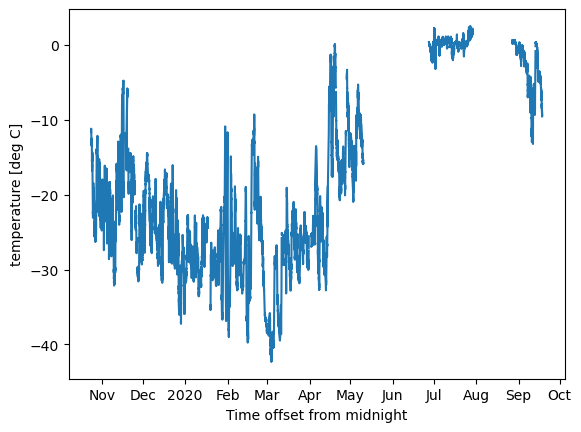

In [38]:
ds.temp_2m.plot()

In [36]:
ds.temp_2m.resample({'time': 'h'}).mean()

<xarray.DataArray 'temp_2m' (time: 240)> Size: 2kB
array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
...
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan, -11.39770509, -11.46529457, -11.751696  ,
       -12.20458981, -12.58452495, -12.91672366, -13.26704234,
       -13.31079556, -13.15901126, -12.85284053, -12.65310364,
       -12.81388775, -13.64746718, -14.85816166, -15.64052429,
       -16.28334236, -15.904299  , -15.43751558, -15.14466094])
Coordinates:
  * time     (time) datetime64[ns] 2kB 2019-10-15 ... 2019-10-24T23:00:00
Attributes: (12/15)
    cf_name:             air_temperature
    data_provenance:     Based on data from the mosflxtowerslow.level1 datast...
    funding_sources:     National Science Foundation OPP1724551 and NOAA Phys...
    height_change_time:  2019-10-15 00:00:00
    height_end:          1.05
    height_start:        1.05
    ...                  ...
    measurement_source:  CIRES, University of Colorado / NOAA atmospheric sur...
    methods:             digitally polled from instument
    percent_missing:     100.0
    platform:            10-m Met Tower
    qc_varname:          Corresponding quality control variable is "temp_2m_qc"
    units:               deg C